In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json

In [2]:
with open("./model/model_archiquecture", "r") as f:
  loaded_json = f.read()

In [3]:
loaded_json

'{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "registered_name": null, "name": "input_1", "inbound_nodes": []}, {"module": "keras.layers", "class_name": "ZeroPadding2D", "config": {"name": "conv1_pad", "trainable": false, "dtype": "float32", "padding": [[3, 3], [3, 3]], "data_format": "channels_last"}, "registered_name": null, "build_config": {"input_shape": [null, 224, 224, 3]}, "name": "conv1_pad", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv1_conv", "trainable": false, "dtype": "float32", "filters": 64, "kernel_size": [7, 7], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": true, "kernel_initia

In [4]:
model = keras.models.model_from_json(loaded_json)

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [6]:
model.load_weights("./model/model_weights.h5")

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [15]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32
LABELS_PATH = "./labels/cat_to_name.json"

In [9]:
validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

validation = validation_data.flow_from_directory("./dataset/valid", target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='rgb', shuffle=True)

Found 818 images belonging to 102 classes.


In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

In [12]:
model.evaluate(validation)

26/26 [==============================] - 49s 2s/step - loss: 7.5558 - acc: 0.3020


[7.555813789367676, 0.3019559979438782]

In [21]:
f = open(LABELS_PATH)

labels = json.load(f)

In [26]:
labels

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

1/1 [==============================] - 0s 122ms/step
[[0.0000000e+00 1.6709644e-15 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 6.4656902e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.4299505e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 8.9474277e-34 0.0000000e+00 0.0000000e+00
  0.0000000

Text(0.5, 1.0, 'Class: love in the mist')

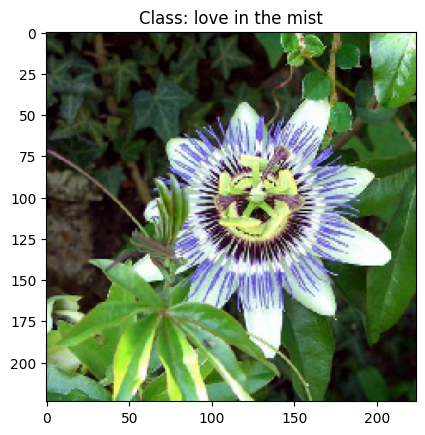

In [29]:
test_img = tf.keras.preprocessing.image.load_img("./dataset/test/image_00005.jpg", target_size=(224, 224), color_mode='rgb')

X = tf.keras.preprocessing.image.img_to_array(test_img)
X = np.expand_dims(X, axis = 0)

prediction = np.vstack([X])

result = model.predict(prediction)

index = np.argmax(result)
acc = result[0][index] * 100

print(result)
print(f"Index: {index}")
print(f"Accuracy: {acc}")

index = str(index +1)

fig, ax = plt.subplots()
ax.imshow(test_img)
ax.set_title(f"Class: {labels[index]}")
